In [41]:
import sqlalchemy as db
import sqlite3
import pandas as pd
from datetime import datetime 
import numpy as np
import ast

In [42]:
engine = db.create_engine('sqlite:///cademycode.db')
connection = engine.connect()

In [43]:
inspector = db.inspect(engine)
schemas = inspector.get_schema_names()

for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        for column in inspector.get_columns(table_name, schema=schema):
            print(f"{table_name}, Column: %s" % column)

schema: main
cademycode_courses, Column: {'name': 'career_path_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_courses, Column: {'name': 'career_path_name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_courses, Column: {'name': 'hours_to_complete', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_student_jobs, Column: {'name': 'job_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_student_jobs, Column: {'name': 'job_category', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_student_jobs, Column: {'name': 'avg_salary', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_students, Column: {'name': 'uuid', 'type': INTEGER(), 'nullable': True, 'default': None, 'primary_key': 0}
cademycode_students, Column: {'name': 'name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'primary_ke

IMPORTING DATA

In [44]:
courses_query = db.text("select * from cademycode_courses")
courses = connection.execute(courses_query).fetchall()

courses_df = pd.DataFrame(courses)

In [45]:
jobs_query = db.text("select * from cademycode_student_jobs")
jobs = connection.execute(jobs_query).fetchall()

jobs_df = pd.DataFrame(jobs)

In [46]:
students_query = db.text("select * from cademycode_students")
students = connection.execute(students_query).fetchall()

students_df = pd.DataFrame(students)

STARTING DATA TIDYING AND WRANGLING

In [47]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        13 non-null     int64 
 1   job_category  13 non-null     object
 2   avg_salary    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [48]:
jobs_df.job_id.value_counts()

job_id
3    2
4    2
5    2
1    1
2    1
6    1
7    1
8    1
9    1
0    1
Name: count, dtype: int64

DUPLICATES PRESENT, DROPPING

In [49]:
jobs_df.drop_duplicates(inplace=True)

In [50]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        10 non-null     int64 
 1   job_category  10 non-null     object
 2   avg_salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


ALL GOOD TO GO FOR JOBS

In [51]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     int64 
 1   career_path_name   10 non-null     object
 2   hours_to_complete  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [52]:
courses_df.career_path_id.value_counts()

career_path_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: count, dtype: int64

ALL GOOD TO GO FOR COURSES

In [53]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    5000 non-null   int64 
 1   name                    5000 non-null   object
 2   dob                     5000 non-null   object
 3   sex                     5000 non-null   object
 4   contact_info            5000 non-null   object
 5   job_id                  4995 non-null   object
 6   num_course_taken        4749 non-null   object
 7   current_career_path_id  4529 non-null   object
 8   time_spent_hrs          4529 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


NULL VALUES IN FOLLOWING COLUMNS: 
- job_id (5 null)
- num_course_taken (251 null)
- current_career_path_id (471 null)
- time_spent_hrs (471 null)

DATA TYPE CHANGES:
- dob (object -> date)
- job_id (object -> float) 
- num_courses_taken (object -> float)
- current_career_path_id (object -> float)
- time_hours_spent (object -> float)

In [54]:
students_df.sex.value_counts()

sex
M    1995
F    1990
N    1015
Name: count, dtype: int64

In [55]:
now = datetime.now()
students_df['dob'] = pd.to_datetime(students_df['dob'])
students_df['age'] = [(now.year - dob.year) for dob in students_df['dob']]
students_df['age_group'] = np.int64((students_df['age']/10)) * 10

In [56]:
students_df['age']

0       81
1       33
2       35
3       36
4       61
        ..
4995    57
4996    60
4997    20
4998    81
4999    30
Name: age, Length: 5000, dtype: int64

In [57]:
students_df['age_group']

0       80
1       30
2       30
3       30
4       60
        ..
4995    50
4996    60
4997    20
4998    80
4999    30
Name: age_group, Length: 5000, dtype: int64

In [58]:
type(students_df['contact_info'][0])

str

In [59]:
# contact info str not json
students_df['contact_info'] = students_df['contact_info'].apply(lambda x: ast.literal_eval(x))
explode_contact_info = pd.json_normalize(students_df['contact_info'])
students_df = pd.concat([students_df.drop('contact_info', axis=1), explode_contact_info], axis=1 )

In [60]:
split_address = students_df.mailing_address.str.split(',', expand=True)
split_address.columns = ['street', 'city', 'state', 'zipcode']
students_df = pd.concat([students_df.drop('mailing_address', axis=1), split_address], axis=1)
students_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zipcode
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,81,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.4,33,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,35,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,36,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,61,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737


In [61]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    5000 non-null   int64         
 1   name                    5000 non-null   object        
 2   dob                     5000 non-null   datetime64[ns]
 3   sex                     5000 non-null   object        
 4   job_id                  4995 non-null   object        
 5   num_course_taken        4749 non-null   object        
 6   current_career_path_id  4529 non-null   object        
 7   time_spent_hrs          4529 non-null   object        
 8   age                     5000 non-null   int64         
 9   age_group               5000 non-null   int64         
 10  email                   5000 non-null   object        
 11  street                  5000 non-null   object        
 12  city                    5000 non-null   object  

ADJUSTING DATA TYPES FOR job_id, num_courses_taken, current_career_path_id and time_hours_spent

In [62]:
students_df['job_id'] = students_df['job_id'].astype('float')
students_df['num_course_taken'] = students_df['num_course_taken'].astype('float')
students_df['current_career_path_id'] = students_df['current_career_path_id'].astype('float')
students_df['time_spent_hrs'] = students_df['time_spent_hrs'].astype('float')

HANDLING MISSING DATA

In [63]:
course_taken_missing = students_df[students_df[['num_course_taken']].isnull().any(axis=1)]

<Axes: xlabel='sex'>

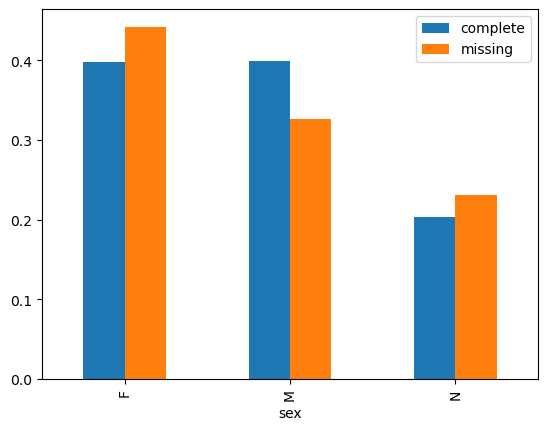

In [64]:
students_group = (students_df.groupby('sex').count()['uuid']/len(students_df)).rename('complete')
missing_group = (course_taken_missing.groupby('sex').count()['uuid']/len(course_taken_missing)).rename('missing')
df = pd.concat([students_group, missing_group], axis=1)
df.plot.bar()

<Axes: xlabel='job_id'>

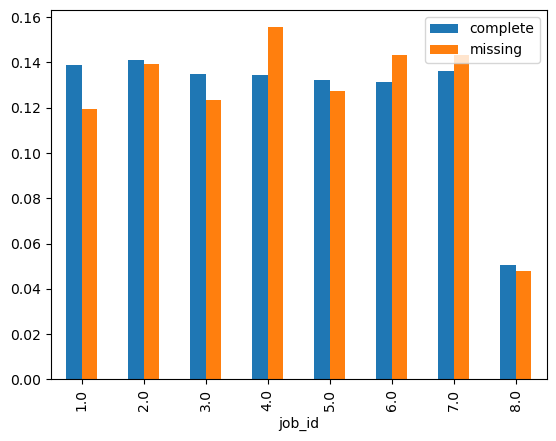

In [65]:
students_group = (students_df.groupby('job_id').count()['uuid']/len(students_df)).rename('complete')
missing_group = (course_taken_missing.groupby('job_id').count()['uuid']/len(course_taken_missing)).rename('missing')
df = pd.concat([students_group, missing_group], axis=1)
df.plot.bar()

<Axes: xlabel='age_group'>

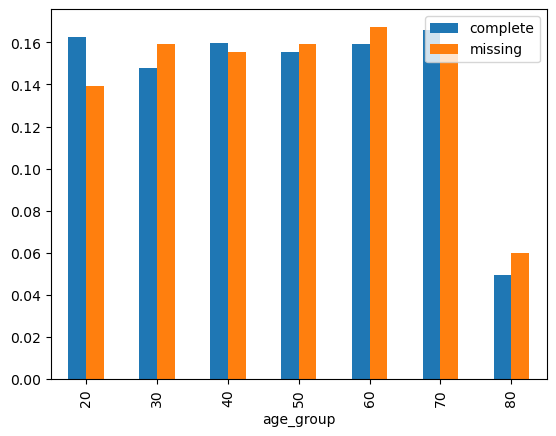

In [66]:
students_group = (students_df.groupby('age_group').count()['uuid']/len(students_df)).rename('complete')
missing_group = (course_taken_missing.groupby('age_group').count()['uuid']/len(course_taken_missing)).rename('missing')
df = pd.concat([students_group, missing_group], axis=1)
df.plot.bar()

students_df likely MAR and does not make up a significant portion of overall data. safe to remove 

In [67]:
students_df = students_df.dropna(subset=['num_course_taken'])
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4749 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4749 non-null   int64         
 1   name                    4749 non-null   object        
 2   dob                     4749 non-null   datetime64[ns]
 3   sex                     4749 non-null   object        
 4   job_id                  4744 non-null   float64       
 5   num_course_taken        4749 non-null   float64       
 6   current_career_path_id  4298 non-null   float64       
 7   time_spent_hrs          4298 non-null   float64       
 8   age                     4749 non-null   int64         
 9   age_group               4749 non-null   int64         
 10  email                   4749 non-null   object        
 11  street                  4749 non-null   object        
 12  city                    4749 non-null   object       

Moving on to job_id

In [68]:
job_id_missing = students_df[students_df[['job_id']].isnull().any(axis=1)]
job_id_missing.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zipcode
162,163,Glen Riley,2002-08-22,M,NaN,8.0,3.0,5.70,22,20,glen_riley4484@hmail.com,P.O. Box 37267,Cornlea village,Tennessee,19192
757,758,Mercedez Vorberg,2002-03-25,F,NaN,15.0,4.0,4.14,22,20,mercedez6297@woohoo.com,284 Cedar Seventh,Virden village,Washington,60489
854,855,Kurt Ho,2002-05-29,M,NaN,0.0,8.0,23.72,22,20,ho6107@inlook.com,P.O. Box 27254,Olin,New Hampshire,60067
1029,1030,Penny Gaines,2002-03-01,N,NaN,15.0,4.0,16.25,22,20,gaines2897@hmail.com,138 Misty Vale,Stockton borough,West Virginia,53630
1542,1543,Frederick Reilly,2002-11-13,M,NaN,7.0,9.0,21.32,22,20,frederick_reilly6971@woohoo.com,P.O. Box 40769,Quakervillage,Maryland,96218


not clear patterns, likely MAR. Small amount of data, good to go to remove 

In [69]:
students_df = students_df.dropna(subset=['job_id'])
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4744 non-null   int64         
 1   name                    4744 non-null   object        
 2   dob                     4744 non-null   datetime64[ns]
 3   sex                     4744 non-null   object        
 4   job_id                  4744 non-null   float64       
 5   num_course_taken        4744 non-null   float64       
 6   current_career_path_id  4293 non-null   float64       
 7   time_spent_hrs          4293 non-null   float64       
 8   age                     4744 non-null   int64         
 9   age_group               4744 non-null   int64         
 10  email                   4744 non-null   object        
 11  street                  4744 non-null   object        
 12  city                    4744 non-null   object       

Moving on to current_career_path_id 

In [70]:
current_career_path_missing = students_df[students_df[['current_career_path_id']].isnull().any(axis=1)]
current_career_path_missing.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zipcode
15,16,Norene Dalton,1976-04-30,F,6.0,0.0,NaN,NaN,48,40,norene_dalton9509@hmail.com,130 Wishing Essex,Branch,Ohio,13616
19,20,Sofia van Steenbergen,1990-02-21,N,7.0,13.0,NaN,NaN,34,30,vansteenbergen8482@inlook.com,634 Clear Barn Dell,Beaman,Georgia,33288
30,31,Christoper Warner,1989-12-28,M,2.0,5.0,NaN,NaN,35,30,warner5906@coldmail.com,556 Stony Highlands,Drain,Illinois,01973
49,50,Antony Horne,1996-05-29,M,3.0,2.0,NaN,NaN,28,20,antony577@coldmail.com,P.O. Box 78685,Lenox,Texas,15516
54,55,Omar Bunk,1955-11-08,M,3.0,14.0,NaN,NaN,69,60,omar1245@coldmail.com,445 Dale Hollow,Vermont village,South Carolina,28329


In [71]:
current_career_path_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 15 to 4974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    451 non-null    int64         
 1   name                    451 non-null    object        
 2   dob                     451 non-null    datetime64[ns]
 3   sex                     451 non-null    object        
 4   job_id                  451 non-null    float64       
 5   num_course_taken        451 non-null    float64       
 6   current_career_path_id  0 non-null      float64       
 7   time_spent_hrs          0 non-null      float64       
 8   age                     451 non-null    int64         
 9   age_group               451 non-null    int64         
 10  email                   451 non-null    object        
 11  street                  451 non-null    object        
 12  city                    451 non-null    object       

time_spent_hrs is also missing when current_career_path_id is missing

In [72]:
students_df['current_career_path_id'].unique()

array([ 1.,  8.,  9.,  3.,  6., 10.,  5., nan,  4.,  7.,  2.])

filling in missing values for current_career_path_id and time_hrs_spent with 0s instead of null

In [73]:
students_df['current_career_path_id'] = np.where(students_df['current_career_path_id'].isnull(), 0, students_df['current_career_path_id'])
students_df['time_spent_hrs'] = np.where(students_df['time_spent_hrs'].isnull(), 0 , students_df['time_spent_hrs'])

adding career path 0 for the missing values in students_df 

In [74]:
no_path = {'career_path_id': 0, 'career_path_name': 'no path', 'hours_to_complete': 0}
courses_df.loc[len(courses_df)] = no_path

In [75]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4744 non-null   int64         
 1   name                    4744 non-null   object        
 2   dob                     4744 non-null   datetime64[ns]
 3   sex                     4744 non-null   object        
 4   job_id                  4744 non-null   float64       
 5   num_course_taken        4744 non-null   float64       
 6   current_career_path_id  4744 non-null   float64       
 7   time_spent_hrs          4744 non-null   float64       
 8   age                     4744 non-null   int64         
 9   age_group               4744 non-null   int64         
 10  email                   4744 non-null   object        
 11  street                  4744 non-null   object        
 12  city                    4744 non-null   object       

MERGING CLEANSED TABLES 

In [76]:
final_df = students_df.merge(courses_df, left_on= 'current_career_path_id', right_on='career_path_id', how='left')
print(len(final_df))
final_df = final_df.merge(jobs_df, on='job_id', how='left')
print(len(final_df))

4744
4744


In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4744 non-null   int64         
 1   name                    4744 non-null   object        
 2   dob                     4744 non-null   datetime64[ns]
 3   sex                     4744 non-null   object        
 4   job_id                  4744 non-null   float64       
 5   num_course_taken        4744 non-null   float64       
 6   current_career_path_id  4744 non-null   float64       
 7   time_spent_hrs          4744 non-null   float64       
 8   age                     4744 non-null   int64         
 9   age_group               4744 non-null   int64         
 10  email                   4744 non-null   object        
 11  street                  4744 non-null   object        
 12  city                    4744 non-null   object  

In [78]:
df_missing = final_df[final_df.isnull().any(axis=1)]
print(str(df_missing))

Empty DataFrame
Columns: [uuid, name, dob, sex, job_id, num_course_taken, current_career_path_id, time_spent_hrs, age, age_group, email, street, city, state, zipcode, career_path_id, career_path_name, hours_to_complete, job_category, avg_salary]
Index: []


In [79]:
sqlite_conn = sqlite3.connect('./prod/cademycode_clean.db')

OperationalError: unable to open database file

In [80]:
final_df.to_sql('student_info', sqlite_conn, if_exists='replace', index=False)

NameError: name 'sqlite_conn' is not defined

In [81]:
cleansed_db_df = pd.read_sql_query("SELECT * FROM student_info", sqlite_conn)

NameError: name 'sqlite_conn' is not defined

In [82]:
cleansed_db_df.info()

NameError: name 'cleansed_db_df' is not defined

In [83]:
sqlite_conn.close()

NameError: name 'sqlite_conn' is not defined

In [164]:
cleansed_db_df.to_csv('student_info_cleansed.csv', index=False)